# K-Mode Clustering on Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In [1]:
!pip install KModes

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

In [3]:
bank = pd.read_csv('bankmarketing.csv')

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank_cust = bank[
            ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome',
            'age','duration','euribor3m', 'y'] ]

In [8]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857,no


In [9]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857,no


In [10]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857,no


In [11]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   job          41188 non-null  object 
 1   marital      41188 non-null  object 
 2   education    41188 non-null  object 
 3   default      41188 non-null  object 
 4   housing      41188 non-null  object 
 5   loan         41188 non-null  object 
 6   contact      41188 non-null  object 
 7   month        41188 non-null  object 
 8   day_of_week  41188 non-null  object 
 9   poutcome     41188 non-null  object 
 10  age          41188 non-null  int64  
 11  duration     41188 non-null  int64  
 12  euribor3m    41188 non-null  float64
 13  y            41188 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 4.4+ MB


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
catVar = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','y']

bank_cust[catVar] = bank_cust[catVar].apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,y
0,3,1,0,0,0,0,1,6,1,1,56,261,4.857,0
1,7,1,3,1,0,0,1,6,1,1,57,149,4.857,0
2,7,1,3,0,2,0,1,6,1,1,37,226,4.857,0
3,0,1,1,0,0,0,1,6,1,1,40,151,4.857,0
4,7,1,3,0,0,2,1,6,1,1,56,307,4.857,0


# We need to do feature engineering and feature selection around categorical fields. 
For the time being bypassing this and just exploring different kind of clustering techniques available.

## Using K-Mode with "Cao" initialization

In [15]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5555, cost: 268488.0


In [16]:
# Predicted Clusters
fitClusters_cao

array([4, 4, 4, ..., 0, 2, 0], dtype=uint16)

In [17]:
pd.DataFrame(km_cao.cluster_centroids_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.036184,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,0.762558,-0.003301,0.192622,-0.674021,-0.587347,0.772999,-0.356309
1,-0.757982,1.358578,-0.349730,-0.513600,-1.087707,-0.452491,1.31827,-0.530547,-1.434368,0.192622,-0.386145,-0.471640,0.773575,-0.356309
2,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,-1.392618,-0.718834,0.192622,-0.865939,-0.649057,0.774728,-0.356309
3,-0.757982,-0.283741,-0.817795,1.945327,-1.087707,-0.452491,-0.75857,1.193593,1.427767,0.192622,-1.057857,-0.668342,0.287536,-0.356309
4,-0.757982,-0.283741,-0.817795,-0.513600,-1.087707,-0.452491,1.31827,0.762558,0.712233,0.192622,-0.002309,-0.475497,0.712460,-0.356309


In [18]:
bank_cust.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'euribor3m',
       'y'],
      dtype='object')

In [19]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [20]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,y
0,-1.036184,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,0.762558,-0.003301,0.192622,-0.674021,-0.587347,0.772999,-0.356309
1,-0.757982,1.358578,-0.349730,-0.513600,-1.087707,-0.452491,1.31827,-0.530547,-1.434368,0.192622,-0.386145,-0.471640,0.773575,-0.356309
2,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,-1.392618,-0.718834,0.192622,-0.865939,-0.649057,0.774728,-0.356309
3,-0.757982,-0.283741,-0.817795,1.945327,-1.087707,-0.452491,-0.75857,1.193593,1.427767,0.192622,-1.057857,-0.668342,0.287536,-0.356309
4,-0.757982,-0.283741,-0.817795,-0.513600,-1.087707,-0.452491,1.31827,0.762558,0.712233,0.192622,-0.002309,-0.475497,0.712460,-0.356309


## Using K-Mode with "Huang" initialization

In [21]:
km_huang = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11744, cost: 265299.0
Run 1, iteration: 2/100, moves: 2885, cost: 265299.0


In [26]:
# Predicted clusters
fitClusters_huang

array([0, 0, 3, ..., 2, 2, 2], dtype=uint16)

In [27]:
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [28]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,-0.757982,-0.283741,-0.349730,-0.5136,-1.087707,-0.452491,1.31827,-0.099512,-0.718834,0.192622,-0.386145,-0.641343,0.772422
1,-1.036184,1.358578,-0.349730,-0.5136,0.942127,-0.452491,-0.75857,-0.530547,-0.003301,0.192622,-1.057857,-0.649057,0.772999
2,-1.036184,-0.283741,1.054464,-0.5136,0.942127,-0.452491,-0.75857,0.762558,-1.434368,0.192622,-0.482104,-0.475497,0.773575
3,-0.757982,-0.283741,-0.817795,-0.5136,0.942127,-0.452491,1.31827,0.762558,1.427767,0.192622,0.477486,-0.251797,0.712460
4,1.467630,1.358578,0.586399,-0.5136,0.942127,-0.452491,-0.75857,-1.823653,1.427767,-2.563098,-0.865939,-0.706911,-1.277824


## Choosing K by comparing Cost against each K

In [29]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 310728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7276, cost: 284302.0
Run 1, iteration: 2/100, moves: 1057, cost: 284302.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6717, cost: 273395.0
Run 1, iteration: 2/100, moves: 1627, cost: 273395.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4807, cost: 267820.0
Run 1, iteration: 2/100, moves: 476, cost: 267820.0


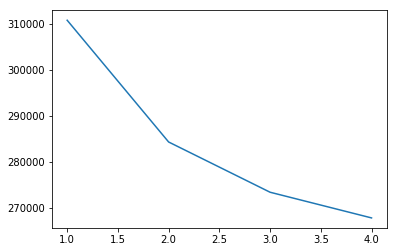

In [30]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [31]:
## Choosing K=2

In [32]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 994, cost: 264535.0
Run 1, iteration: 2/100, moves: 0, cost: 264535.0


In [33]:
fitClusters_cao

array([4, 4, 4, ..., 0, 2, 0], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [ ]:
bank_cust.info()

In [ ]:

clustersDf.info()

In [34]:
bank_cust = bank_cust.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [35]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,cluster_predicted
0,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.533034,0.010471,0.71246,4
1,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.628993,-0.421501,0.71246,4
2,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.290186,-0.124520,0.71246,4
3,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.002309,-0.413787,0.71246,4
4,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622,1.533034,0.187888,0.71246,4


In [36]:
combinedDf.cluster_predicted.unique()

array([4, 1, 3, 0, 2], dtype=uint64)

In [42]:
# Data for Cluster0
cluster0 = combinedDf[combinedDf.cluster_predicted==0]

In [43]:
# Data for Cluster1
cluster1 = combinedDf[combinedDf.cluster_predicted==1]

# Data for Cluster2
cluster2 = combinedDf[combinedDf.cluster_predicted==2]

# Data for Cluster3
cluster3 = combinedDf[combinedDf.cluster_predicted==3]

# Data for Cluster4
cluster4 = combinedDf[combinedDf.cluster_predicted==4]

In [46]:
cluster0.shape

(18809, 14)

In [47]:
cluster1.shape

(5640, 14)

In [48]:
cluster2.shape

(6632, 14)

In [49]:
cluster3.shape

(5530, 14)

In [50]:
cluster4.shape

(4577, 14)

In [53]:
# Checking the count per category for JOB
job0_df = pd.DataFrame(cluster0['job'].value_counts())
job1_df = pd.DataFrame(cluster1['job'].value_counts())
job2_df = pd.DataFrame(cluster2['job'].value_counts())
job3_df = pd.DataFrame(cluster3['job'].value_counts())
job4_df = pd.DataFrame(cluster4['job'].value_counts())


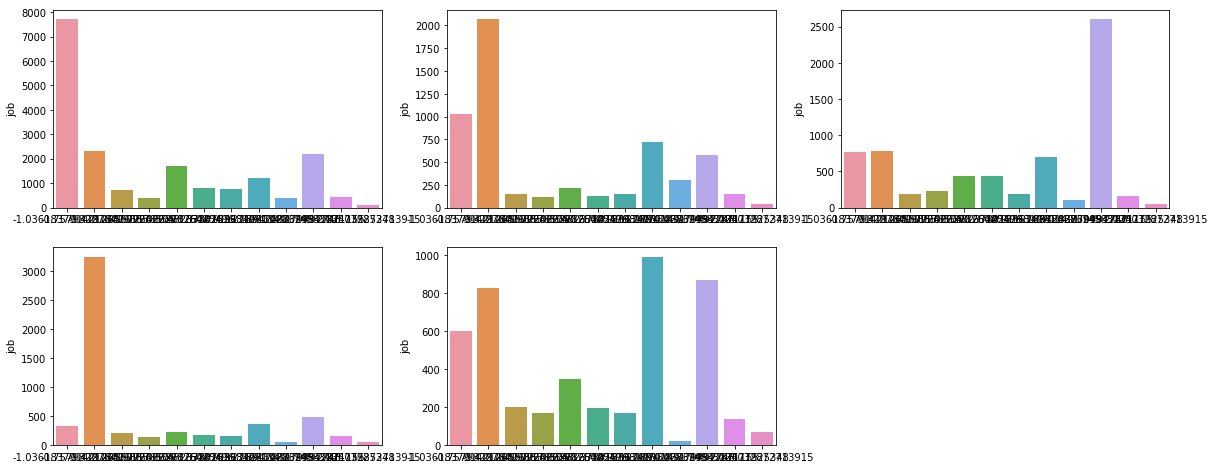

In [64]:
fig, ax =plt.subplots(figsize=(20,8))
plt.subplot(2,3,1)
sns.barplot(x=job0_df.index, y=job0_df['job'])
plt.subplot(2,3,2)
sns.barplot(x=job1_df.index, y=job1_df['job'])
plt.subplot(2,3,3)
sns.barplot(x=job2_df.index, y=job2_df['job'])
plt.subplot(2,3,4)
sns.barplot(x=job3_df.index, y=job3_df['job'])
plt.subplot(2,3,5)
sns.barplot(x=job4_df.index, y=job4_df['job'])

fig.show()

In [ ]:
age1_df = pd.DataFrame(cluster1['age_bin'].value_counts())
age0_df = pd.DataFrame(cluster0['age_bin'].value_counts())

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age1_df.index, y=age1_df['age_bin'], ax=ax[0])
sns.barplot(x=age0_df.index, y=age0_df['age_bin'], ax=ax[1])
fig.show()

In [ ]:
print(cluster1['marital'].value_counts())
print(cluster0['marital'].value_counts())

In [ ]:
print(cluster1['education'].value_counts())
print(cluster0['education'].value_counts())